In [1]:
import pandas as pd

C:\Users\voqua\AppData\Local\Temp\ipykernel_16048\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
myDF = pd.read_csv("../placement-decisions-different-costs/combined_placementDecisions_rl_los_cost_3_WR_cap.csv")

In [20]:
# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in myDF.iterrows():
    if item['placement'] == 'work release':
        myDF['placement'].iat[ind] = '0'
    elif item['placement'] == 'home detention':
        myDF['placement'].iat[ind] = '1'
    elif item['placement'] == 'jail':
        myDF['placement'].iat[ind] = '2'

#object to int
myDF['placement'] = pd.to_numeric(myDF['placement'])

In [22]:
myDF.columns

Index(['c_occu_jail', 'c_occu_wr', 'c_occu_hd', 'c_vio', 'ocp_jl_low_los',
       'ocp_jl_total', 'ocp_wr_low_los', 'ocp_wr_total', 'ocp_hd_low_los',
       'ocp_hd_total', 'class_mild', 'need', 'placement', 'modified_jail',
       'modified_hd', 'modified_wr'],
      dtype='object')

In [23]:
myDF['modified_jail'] = myDF['c_occu_jail']*myDF['ocp_jl_total']
myDF['modified_hd'] = myDF['c_occu_hd']*myDF['ocp_hd_total']
myDF['modified_wr'] = myDF['c_occu_wr']*myDF['ocp_wr_total']
myDF.drop(['ocp_jl_total', 'ocp_hd_total', 'ocp_wr_total', 'c_occu_wr', 'c_occu_hd', 'c_occu_jail','ocp_jl_low_los', 'ocp_wr_low_los','ocp_hd_low_los','need'], axis = 1, inplace = True)

In [24]:
y = myDF['placement']
X = myDF.drop(['placement'], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 50)

In [25]:
trained_rf = RandomForestClassifier(max_depth=None , max_features = 'log2', min_samples_leaf = 2, min_samples_split = 4, n_estimators= 230)
trained_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=230)

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, trained_rf.predict_proba(X_test), multi_class='ovr' )

0.9877620311561031

In [27]:
from sklearn.metrics import f1_score
y_pred = trained_rf.predict(X_test)
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))

f1_score: 0.9168489685093897


In [13]:
## SHAP library

In [28]:
import shap

In [29]:
import shap
explainer = shap.TreeExplainer(trained_rf)
shap_values = explainer(X_train)

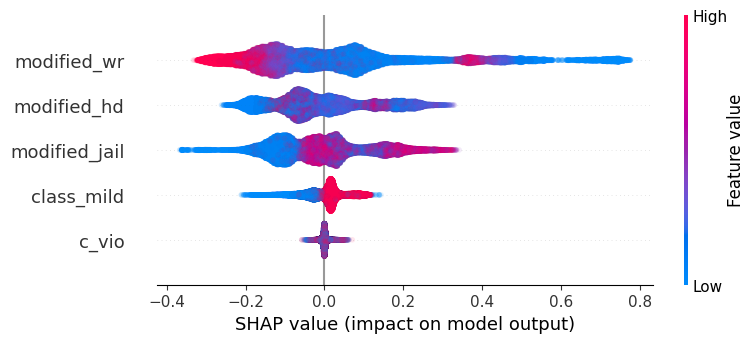

In [30]:
shap.plots.beeswarm(shap_values[:,:,0], alpha = 0.1) # work release, cap

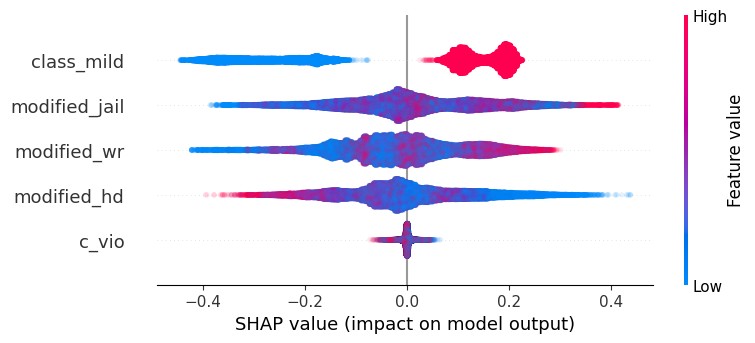

In [32]:
shap.plots.beeswarm(shap_values[:,:,1], alpha = 0.1) #Home detention, cap

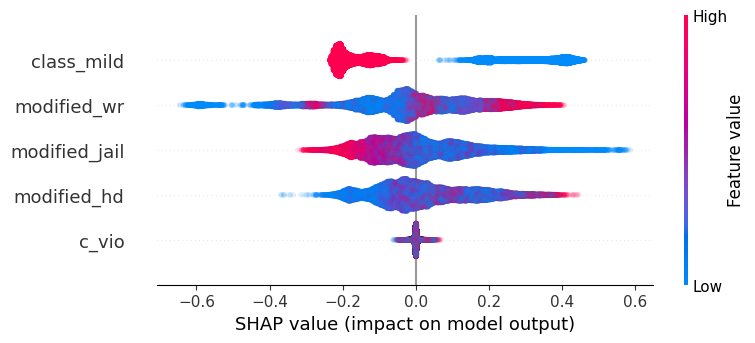

In [33]:
shap.plots.beeswarm(shap_values[:,:,2], alpha = 0.1) # Jail, cap